# Medidas de Localización 

Medidas típicas, que son paramétricas:
- Media: $\mu = \frac{\sum_{i=1}^{N} x_i}{N} $
- Desviación $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i -\mu)^2}$
- Asimetría.
- etc...

Existen otras medidas que son no paramétricas, estas pueden ser:
- Mediana.
- Quintiles.
- Deciles.
- ..
- etc.
- Cuantiles.

Dependiendo de la medida esta puede ser o no robusta, esto significa que no se vea afectada fácilmente por aspectos tales como:

- Cantidad de datos.
- Calidad de los datos.


___

## Ejemplo de medidas paramétricas:

In [14]:
%matplotlib inline
import numpy as np
import pylab as pl

Serie = np.random.normal(0,1,1000)
# Impresión de la media y la desviación
print Serie.mean()
print Serie.std()

-0.0108811294739
1.04385100251


Pero miren lo que pasa con la mediana 

In [15]:
print np.percentile(Serie,50)
print np.median(Serie)

-0.054493753954
-0.054493753954


## Que ocurre 

- La media esperada es 0, sin embargo esta presenta una diferencia.
- Igualmente ocurre conla desviación estandar.
___
- Pero no ocurre lo mismo con la mediana, en 1000 datos se presenta dos ordenes de magnitud más cerca de 0 

**La siguiente figura ejemplifica esto:**

### Definición de función para graficar 

In [16]:
def GraficaHistogramaParam(Values,bins=15):
    # Genera el histograma de valores
    h,b = np.histogram(Values,bins=bins)
    h = h.astype(float); h = h / h.sum()
    b = (b[1:]+b[:-1])/2.0
    # Obtiene la figura 
    fig=pl.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(b,h,'b',lw=2)
    ax.fill_between(b,h,color='b',alpha=0.2)
    ax.set_xlabel('$X$',size=15)
    ax.set_ylabel('$f(x)$',size=15)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,h.max()+0.05)
    ax.grid(True)
    ax.legend(loc=0)
    # Grafica las localizaciones
    ax.vlines(Values.mean(),0,h.max()+0.05,lw=2,color='r')
    ax.vlines([Values.mean()+Values.std(),Values.mean()-Values.std()],0,h.max()+0.05,lw=1,color='r')
    pl.show()


In [19]:
def GraficaHistogramaNoParam(Values,bins=15):
    # Genera el histograma de valores
    h,b = np.histogram(Values,bins=bins)
    h = h.astype(float); h = h / h.sum()
    b = (b[1:]+b[:-1])/2.0
    # Obtiene la figura 
    fig=pl.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(b,h,'b',lw=2)
    ax.fill_between(b,h,color='b',alpha=0.2)
    ax.set_xlabel('$X$',size=15)
    ax.set_ylabel('$f(x)$',size=15)
    ax.set_xlim(-3,3)
    ax.set_ylim(0,h.max()+0.05)
    ax.grid(True)
    ax.legend(loc=0)
    # Grafica las localizaciones
    ax.vlines(np.percentile(Values,50),0,h.max()+0.05,lw=2,color='r')
    ax.vlines([np.percentile(Values,10),np.percentile(Values,90)],0,h.max()+0.05,lw=1,color='r')
    pl.show()


## Grafica de las medidas de localización paramétricas

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "
/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


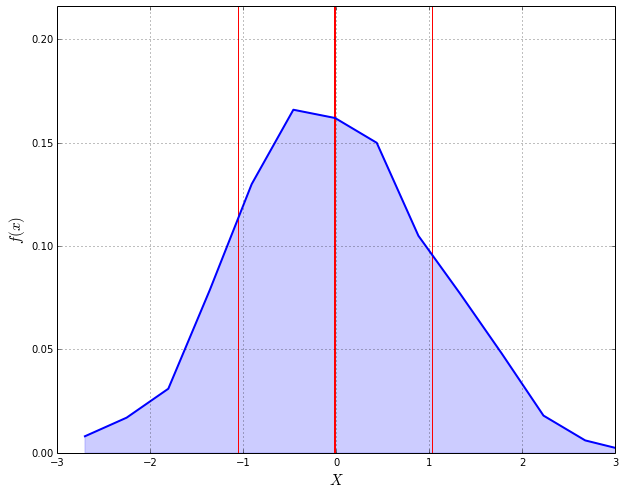

In [18]:
GraficaHistogramaParam(Serie)

## Gráfica de medidas no paramétricas 

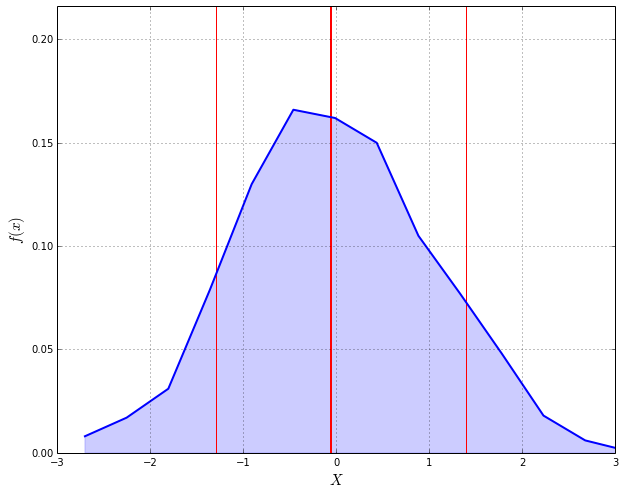

In [20]:
GraficaHistogramaNoParam(Serie)

## Caso con menos datos 

En un caso con menor cantida dde datos se espera tener una mayor diferencia entre ambas medidas, de ahí si inestabilidad:

In [31]:
Serie = np.random.uniform(2.5,10,2e5)
print Serie.mean()
print np.median(Serie)
from scipy import stats as st
print st.skew(Serie)


6.24550468821
6.24046491251
0.00197201571583


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


### Ejercicio para observar robustez en ambas medidas

En el siguiente ejercicio generamos 200 veces series aleatorias cada una con 25 entradas, 
luego vamos a comprar como son las diferencias entre las medias y las medianas encontradas para cada uno de los casos.

In [32]:
medianas = np.zeros(20000)
medias=np.zeros(20000)
for i in range(20000):
    Serie = np.random.normal(0,1,25)
    medias[i] = Serie.mean()
    medianas[i]=np.median(Serie)

In [33]:
def ComparaHistogramas(Vec1,Vec2,bins=15):
    # Genera el histograma de valores
    h1,b1 = np.histogram(Vec1,bins=bins)
    h1 = h1.astype(float); h1 = h1 / h1.sum()
    b1 = (b1[1:]+b1[:-1])/2.0
    h2,b2 = np.histogram(Vec2,bins=bins)
    h2 = h2.astype(float); h2 = h2 / h2.sum()
    b2 = (b2[1:]+b2[:-1])/2.0
    #Genera la figura 
    fig=pl.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.plot(b1,h1,'b',lw=2,label='Vec 1')
    ax.plot(b2,h2,'r',lw=2,label='Vec 2')
    ax.fill_between(b1,h1,color='b',alpha=0.2)
    ax.fill_between(b2,h2,color='r',alpha=0.2)
    ax.set_xlabel('$X$',size=15)
    ax.set_ylabel('$f(x)$',size=15)
    ax.set_xlim(-1,1)
    ax.set_ylim(0,h1.max()+0.05)
    ax.grid(True)
    ax.legend(loc=0)
    # Grafica las localizaciones
    pl.show()
    return h1,h2

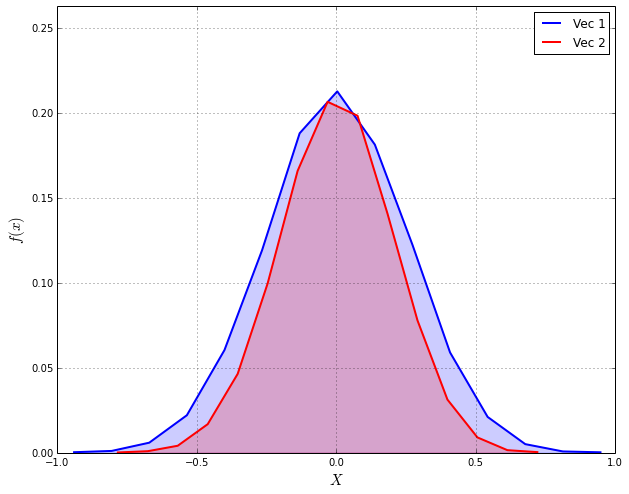

In [34]:
HistMedianas, HistMedias = ComparaHistogramas(medianas,medias)

## Suceptibilidad a Datos Atípicos 

Un dato atípico se define como aquel dato que se encuentra fuera del rango de oscilación de los datos, o bien que no es coherente con la física del fenómeno que se está sensando, los siguientes son ejemplos de datos atípicos:

- Valores exageradamente altos.
- Valores negativos en casos de fenómenos sin valores negativos.
- Valores fuera de un rango definido.
- Secuencia de valores con el mismo valor (no es tanto atípico, pero si es un indicio de problemas)

Una forma de identificarlos es a partir de la media de los valores y la desviación, o los percentiles sobre los que se ubiquen.

- $ValAtipico > \mu + N \sigma$, donde $N$ oscila de acuerdo a lo fuerte que se quiera hacer la pregunta 
- $ValAtipico > P_{99.9}$
___

Dependiendo de la cantidad de registros en los datos, de la cantidad de valores atípicos y de los valores que estos tengan pueden tener o no consecuencias sobre la serie y sobre posteriores análisis que se realicen sobre la misma.


### Ejemplo de robustez ante datos atípicos

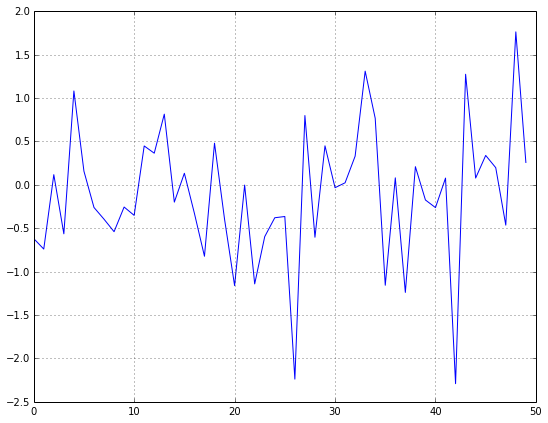

In [35]:
Serie = np.random.normal(0,1,50)
fig = pl.figure(figsize=(9,7))
pl.plot(Serie)
pl.grid(True)

### Incertemos un dato loco, que se salga 

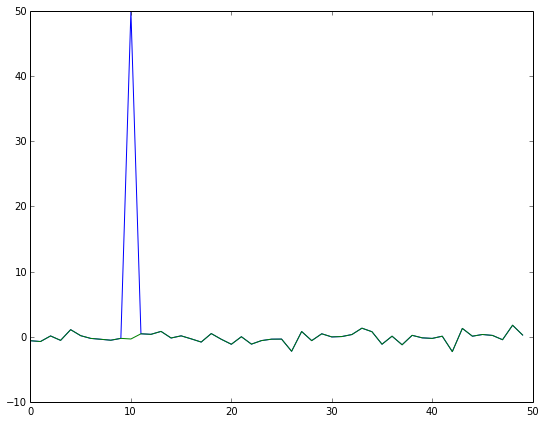

In [36]:
Serie2 = np.copy(Serie)
Serie2[10] = 50.0
fig = pl.figure(figsize=(9,7))
pl.plot(Serie2)
pl.plot(Serie)

Ahora veamos que ocurre con la media:

In [37]:
print Serie.mean()
print Serie2.mean()

-0.121089383472
0.885952982227


Y que ocurre con la mediana:

In [39]:
print np.median(Serie)
print np.median(Serie2)

-0.104065434749
-0.0182564049349


## Introducción de múltiples Outliers

Que pasa si se introduce una alta cantidad de datos atípicos?, es decir como es la tasa a 
la cual la media puede ir pasando a ser cada ves un estimador con un mayor error?.

In [40]:
def CreaOutliers(vect,NumOut,Mult=10):    
    # Encuentra el rango de oscilacion 
    Per = np.array([np.percentile(vect,i) for i in [0.1,99.9]])
    # Genera los aleatorios 
    vectOut = np.copy(vect)
    for i in np.random.choice(vect.shape[0],NumOut):
        p = np.random.choice(2,1)[0]
        vectOut[i] = vectOut[i] + Per[p]*Mult*np.random.uniform(2,15,1)[0]
    return vectOut

In [41]:
print Serie3.mean()
print Serie.mean()
print '----------'
print np.median(Serie3)
print np.median(Serie)

NameError: name 'Serie3' is not defined

In [43]:
# Definición de variables
N = 1000
S1 = np.random.normal(0,1,N)
Medias = []; Std = []
Medianas = []; R25_75 = []
# Introduccion de outliers
for i in np.arange(5,200):
    S2 = CreaOutliers(S1, i)
    Medias.append(S2.mean())
    Medianas.append(np.median(S2))
    Std.append(S2.std())
    R25_75.append(np.percentile(S2,75)-np.percentile(S2,25))
Medias = np.array(Medias)
Medianas = np.array(Medianas)


## Resultados:

Según lo obtenido la mediana se ve altamente afectada, y la desviación también:

## Caso de una distribución Normal

In [46]:
# Definición de variables
N = 1000
S1 = np.random.uniform(0,1,N)
Medias = []; Std = []
Medianas = []; R25_75 = []
# Introduccion de outliers
for i in np.arange(5,200):
    S2 = CreaOutliers(S1, i)
    Medias.append(S2.mean())
    Medianas.append(np.median(S2))
    Std.append(S2.std())
    R25_75.append(np.percentile(S2,75)-np.percentile(S2,25))
Medias = np.array(Medias)
Medianas = np.array(Medianas)


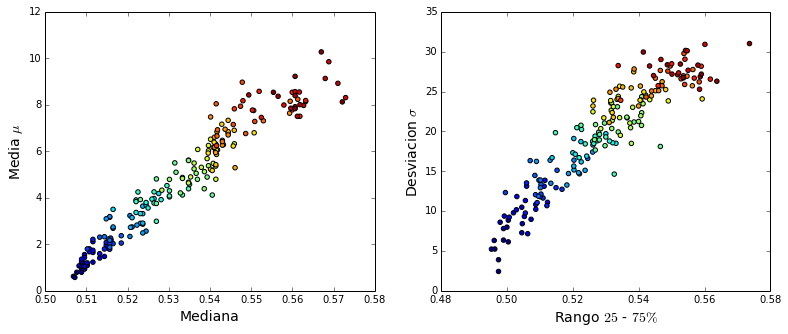

In [47]:
fig = pl.figure(figsize=(13,5))
ax = fig.add_subplot(121)
ax.scatter(Medianas,Medias,c=np.arange(5,200))
ax.set_xlabel('Mediana',size=14)
ax.set_ylabel('Media $\mu$',size=14)
ax = fig.add_subplot(122)
ax.scatter(R25_75,Std,c=np.arange(5,200))
#ax.set_xlim(0,1)
ax.set_xlabel('Rango $25%$ - $75\%$',size=14)
ax.set_ylabel('Desviacion $\sigma$',size=14)
pl.show()

## Caso de una distribución uniforme

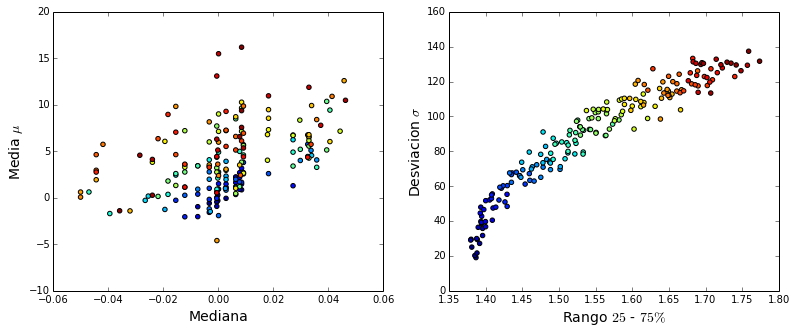

In [45]:
fig = pl.figure(figsize=(13,5))
ax = fig.add_subplot(121)
ax.scatter(Medianas,Medias,c=np.arange(5,200))
ax.set_xlabel('Mediana',size=14)
ax.set_ylabel('Media $\mu$',size=14)
ax = fig.add_subplot(122)
ax.scatter(R25_75,Std,c=np.arange(5,200))
#ax.set_xlim(0,1)
ax.set_xlabel('Rango $25%$ - $75\%$',size=14)
ax.set_ylabel('Desviacion $\sigma$',size=14)
pl.show()

## Cuantiles 

Como una medida no paramétrica de la distribución de los datos se encuentran los cuantiles,
el más conocido es la mediana, sin embargo se pueden obtener cuantiles de cualquier medida.

**Que representan** : El cuantil del 25% igual a 3.56, indica que el 25% de los datos son iguales o inferiores a 3.56.

Al ser una medida no paramétrica se ve poco afectada por errores en los datos y por datos atípicos.

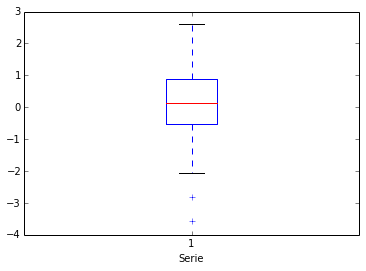

In [154]:
S1 = np.random.normal(0,1,100)
a=pl.boxplot(S1)
a=pl.xlabel('Serie')

## Caso de Introducción de Outliers

QQ plot de las series donde se introducen outliers y la serie en donde no 

In [52]:
S1 = np.random.normal(0,1,100)
S2 = CreaOutliers(S1,10)
Per1 = np.array([np.percentile(S1,i) for i in range(10,91,10)])
Per2 = np.array([np.percentile(S2,i) for i in range(10,91,10)])

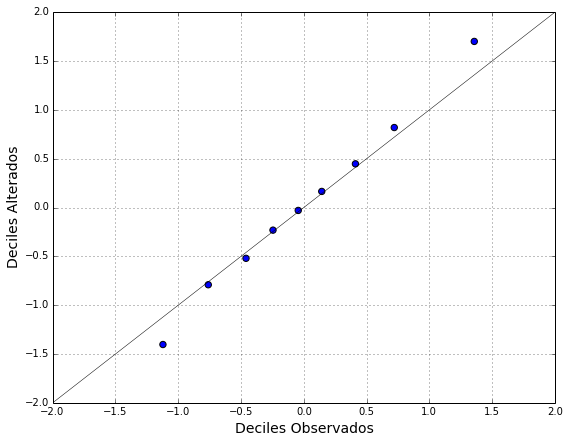

In [53]:
fig = pl.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.scatter(Per1,Per2,s=40)
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.grid(True)
ax.set_xlabel('Deciles Observados',size =14); ax.set_ylabel('Deciles Alterados',size=14) 
ax.plot([-2,2],[-2,2],lw=0.5,c='k')
pl.show()